In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

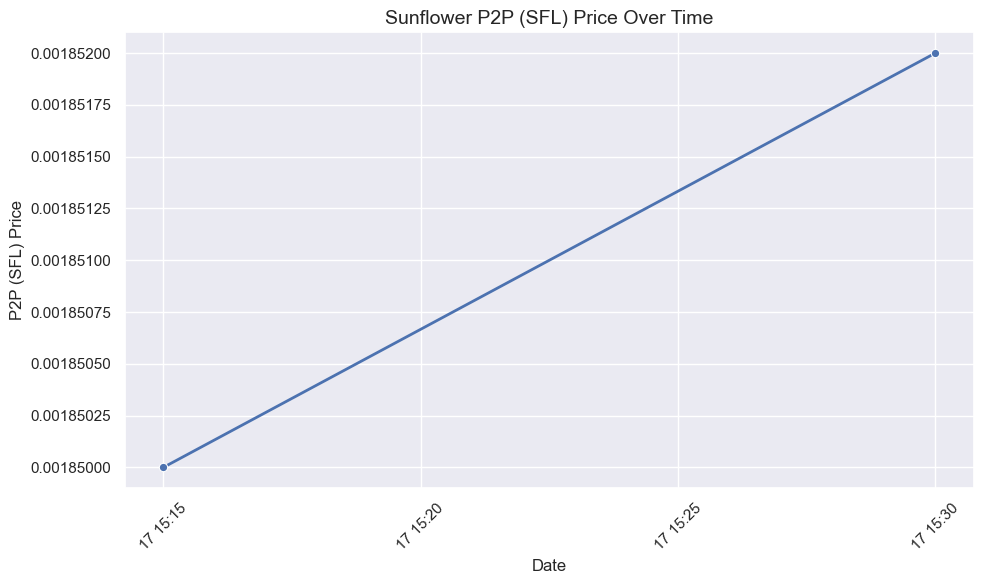

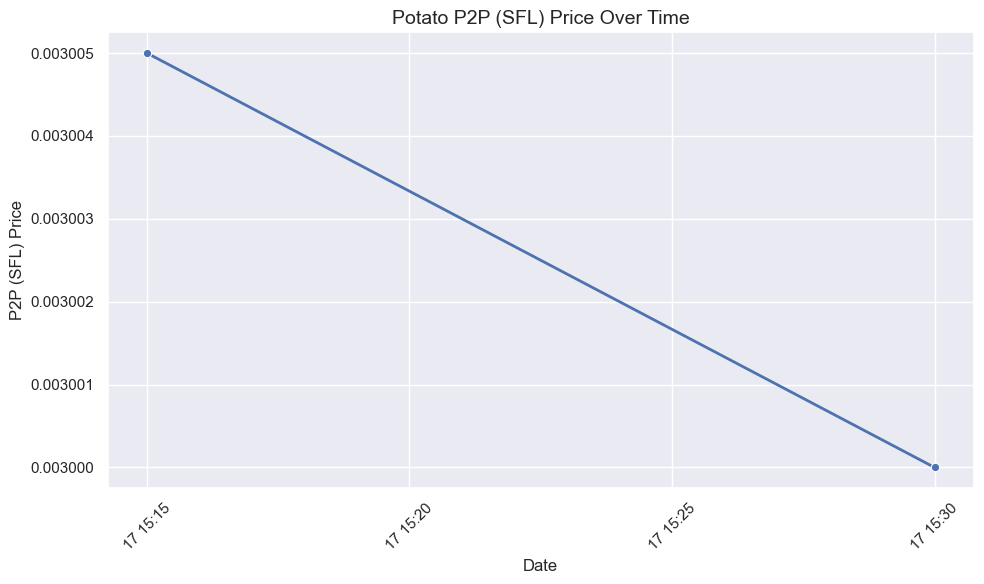

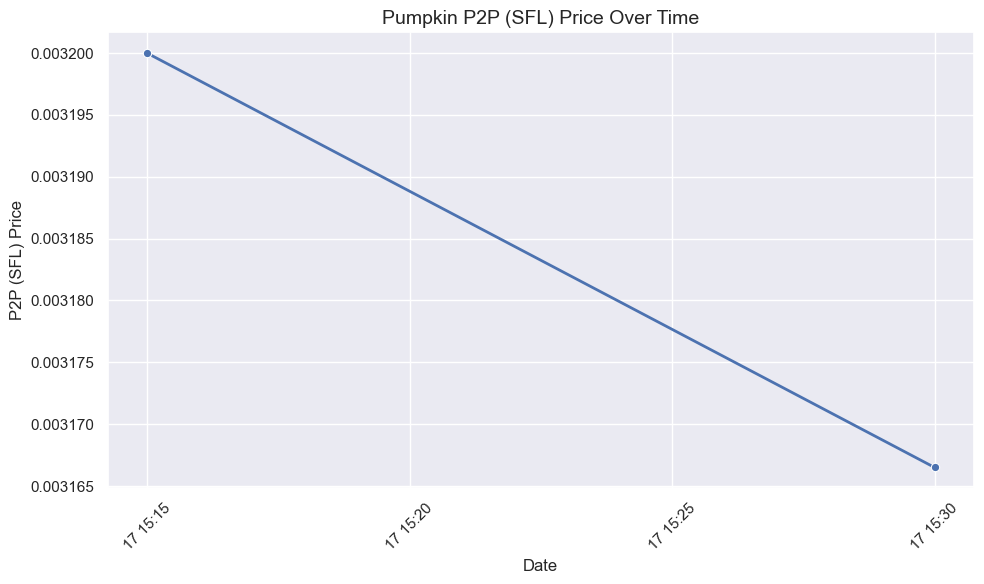

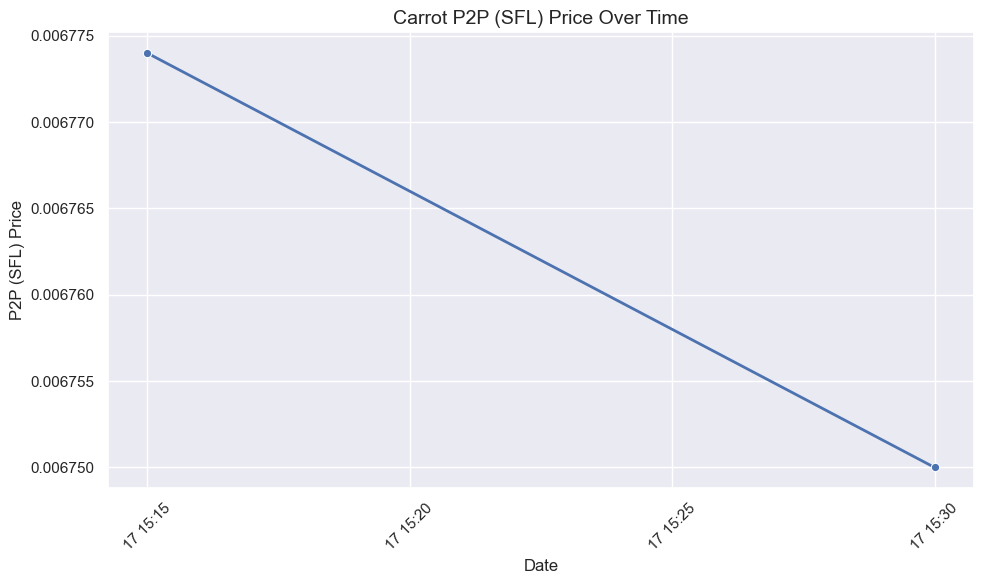

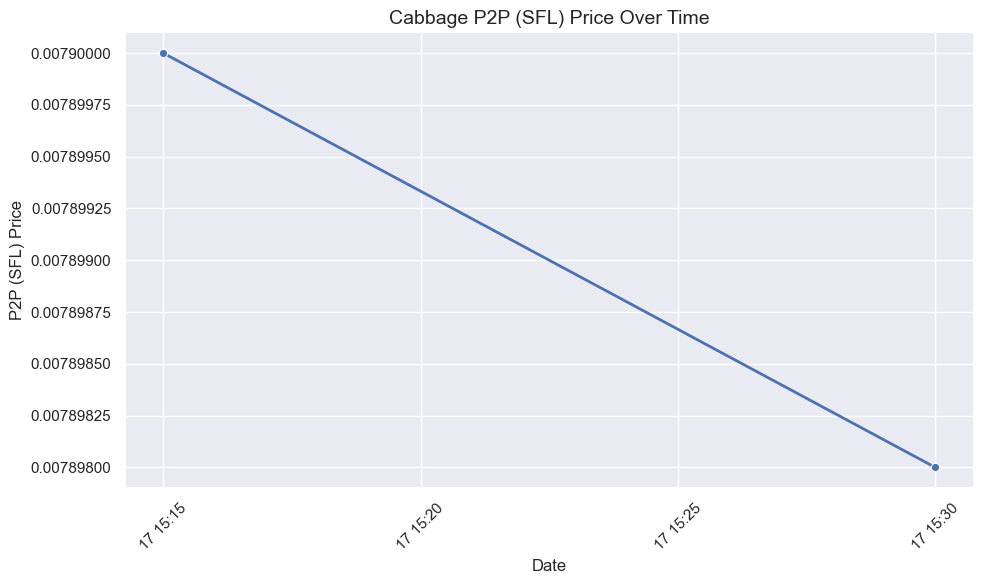

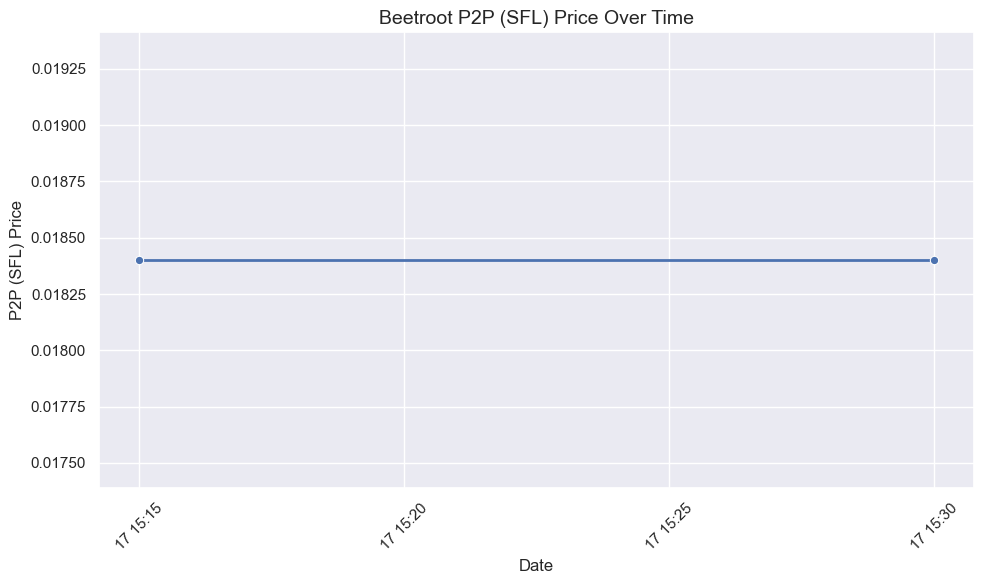

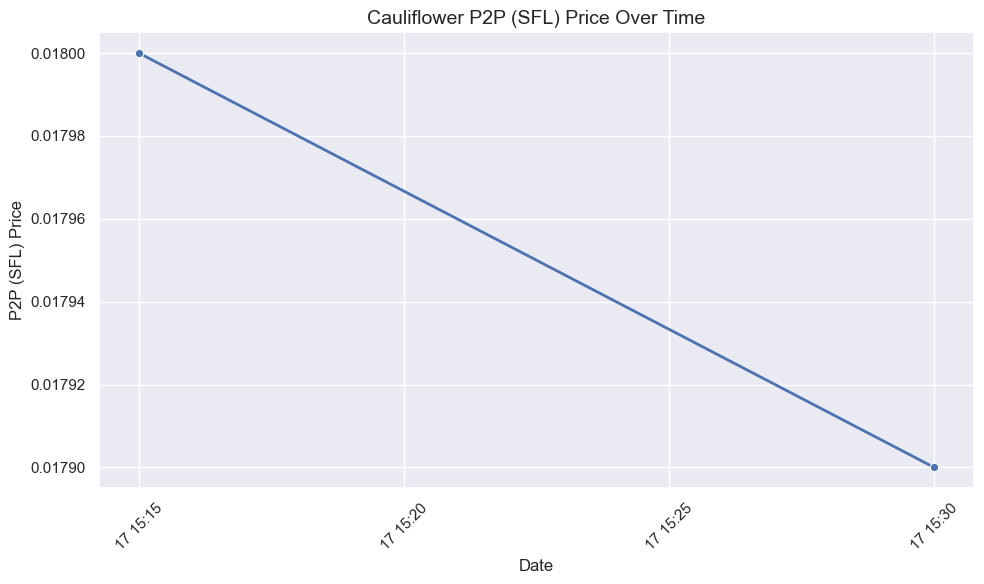

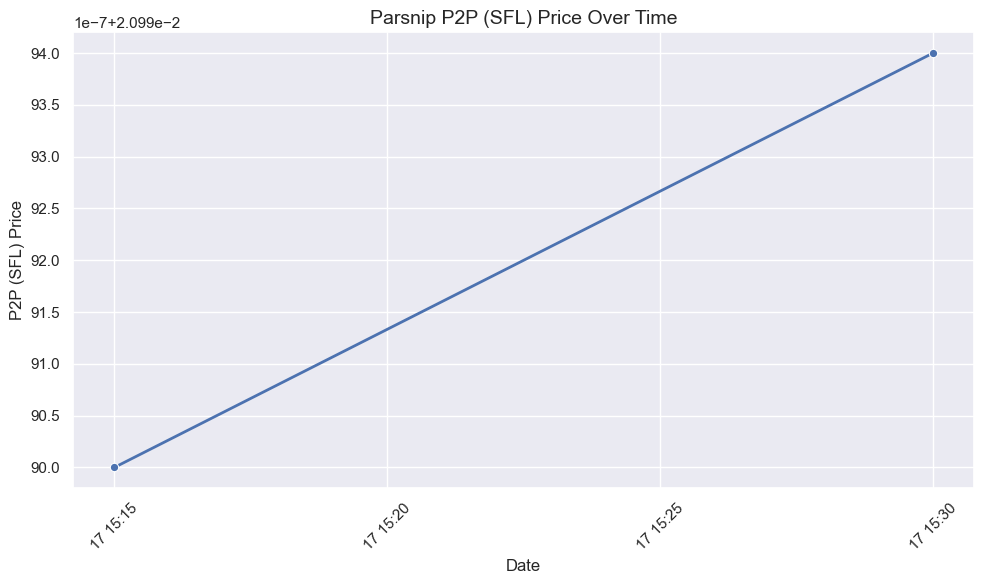

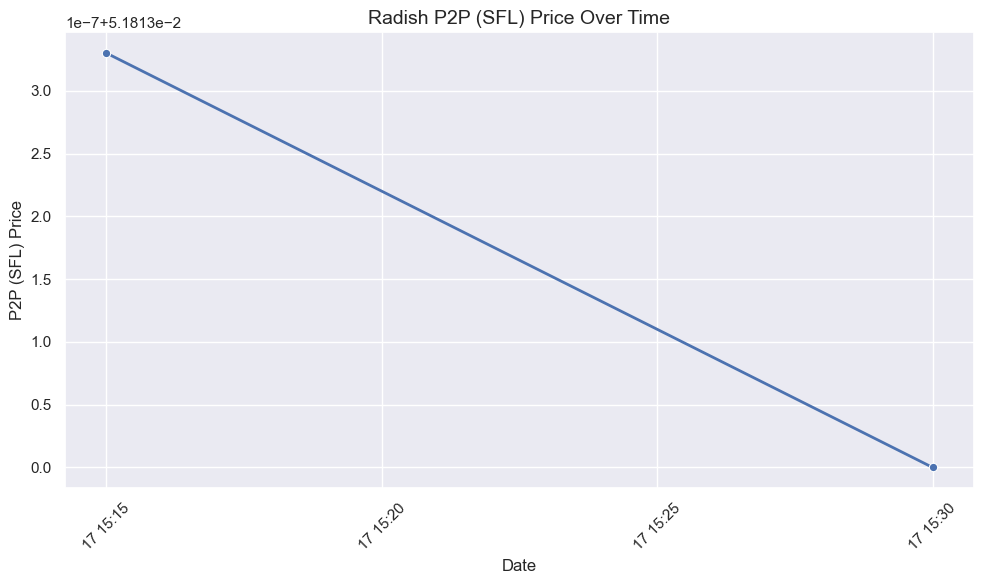

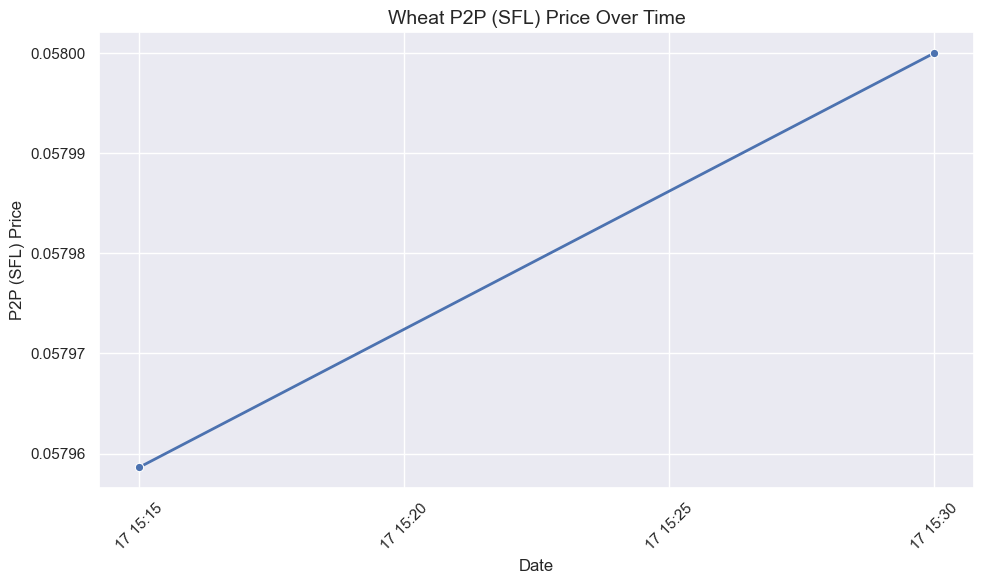

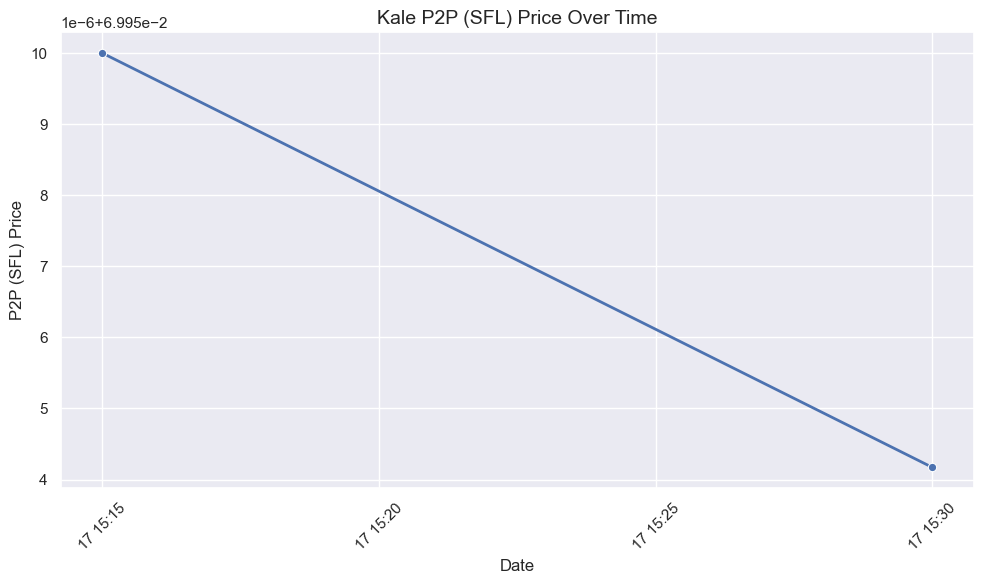

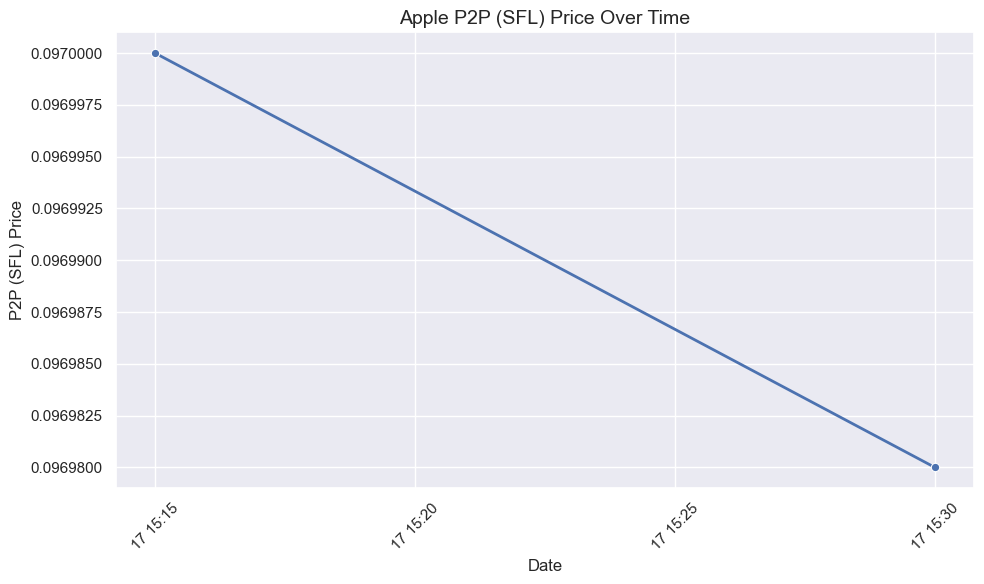

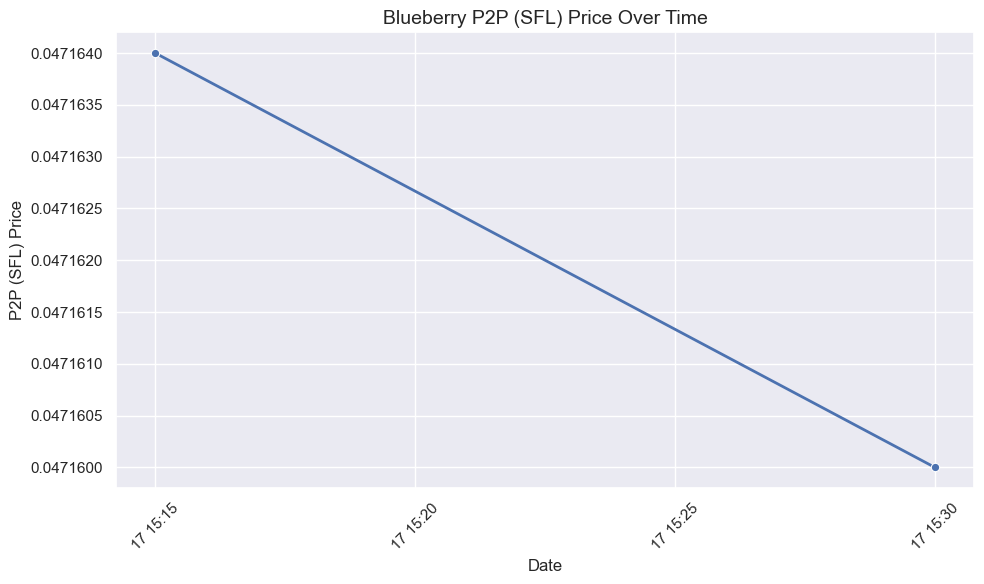

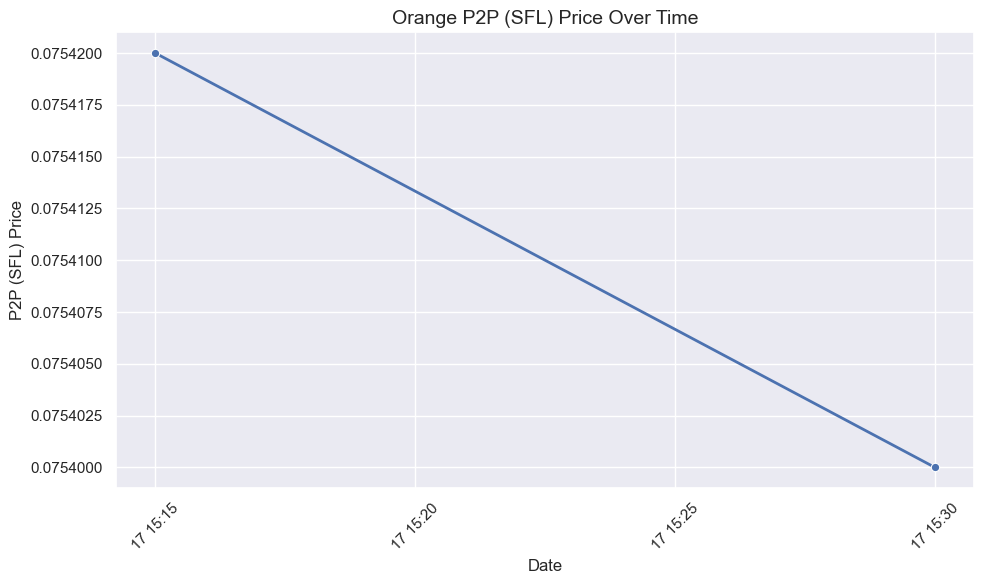

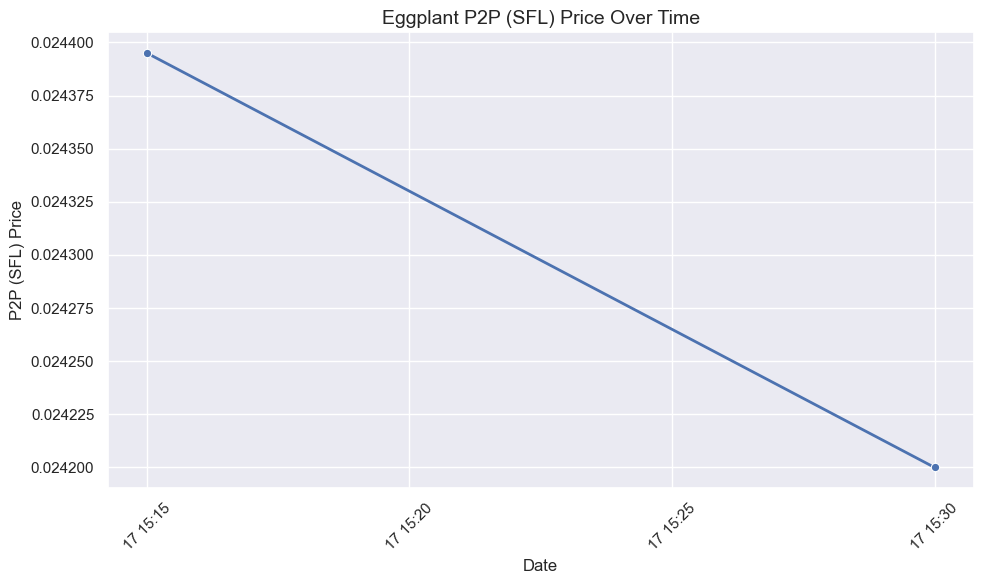

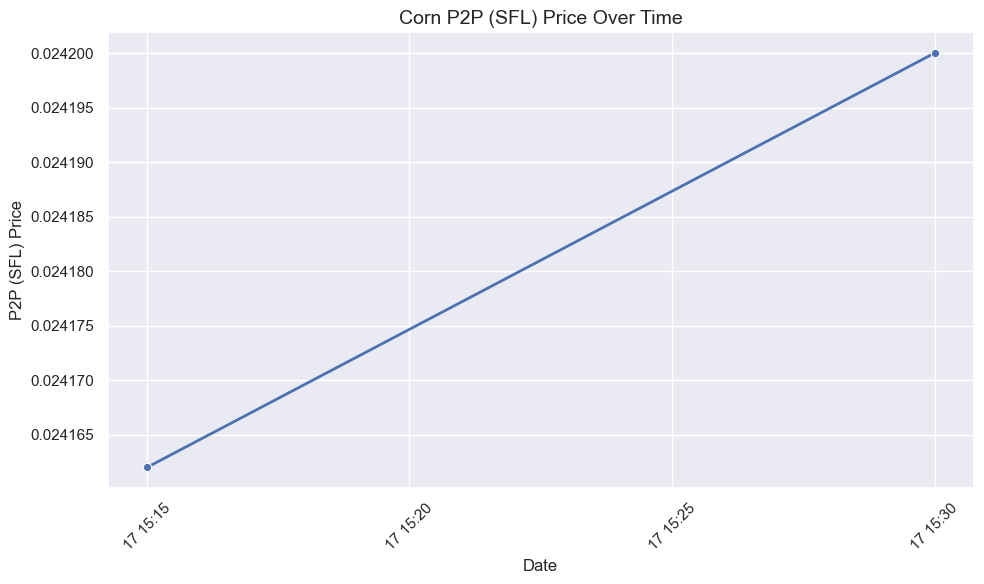

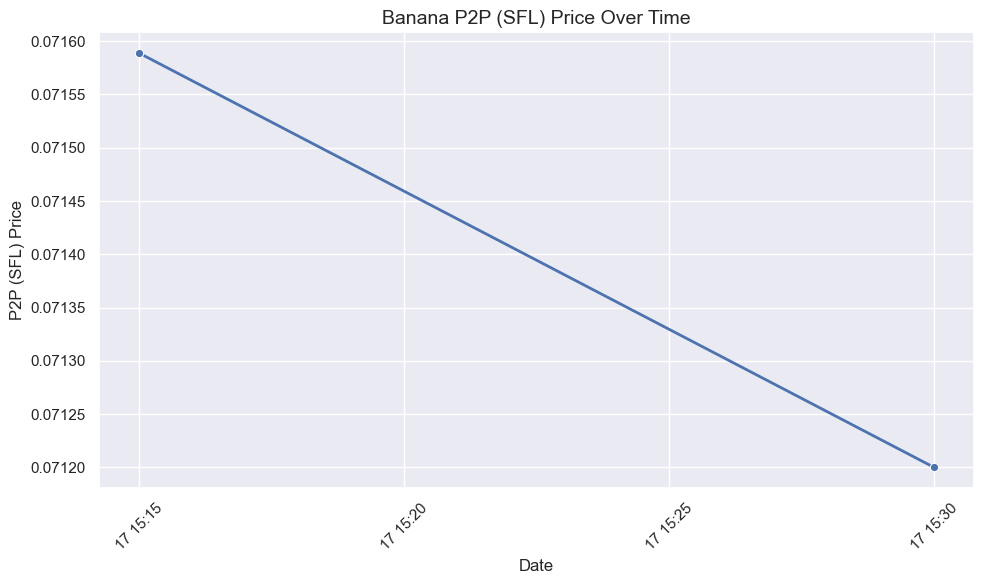

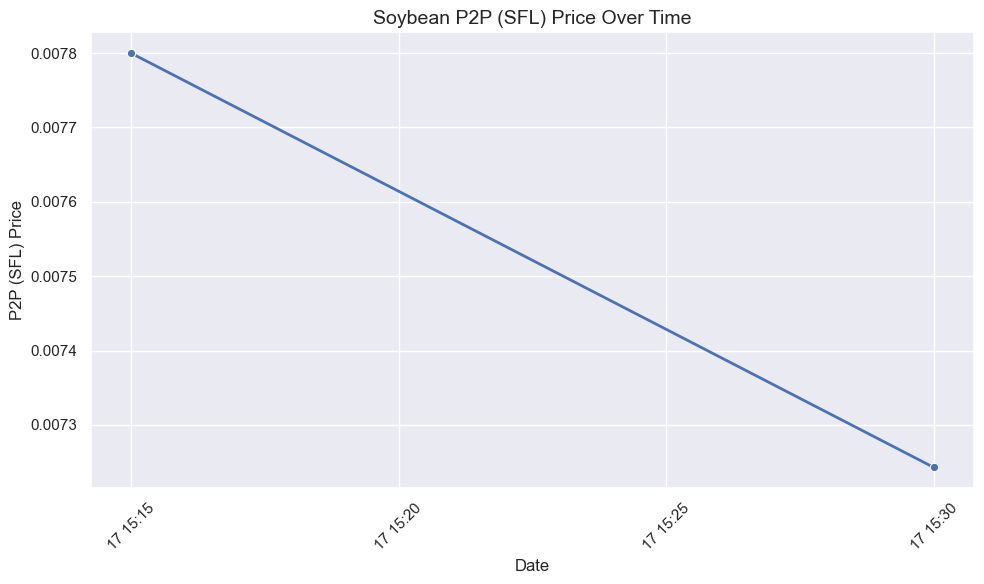

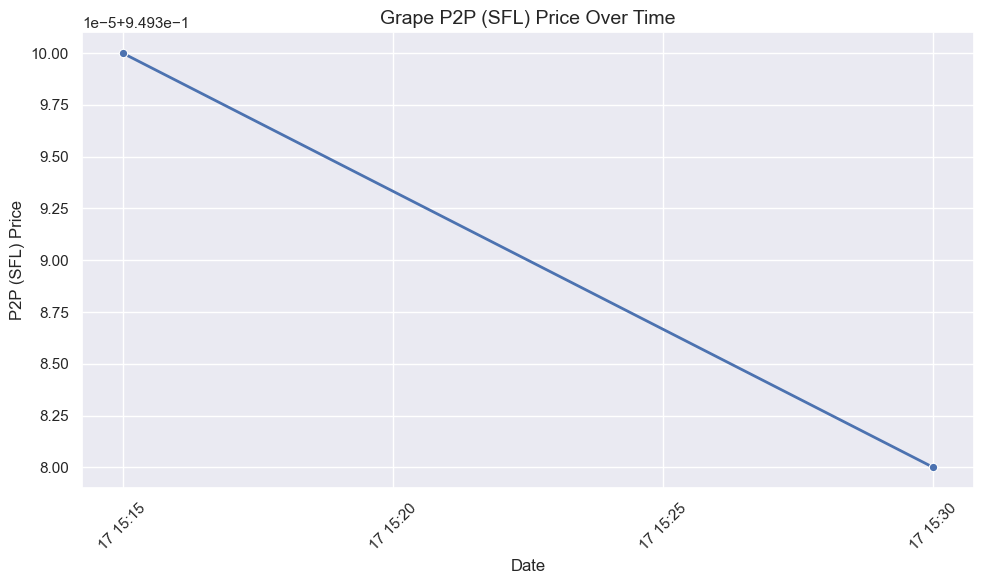

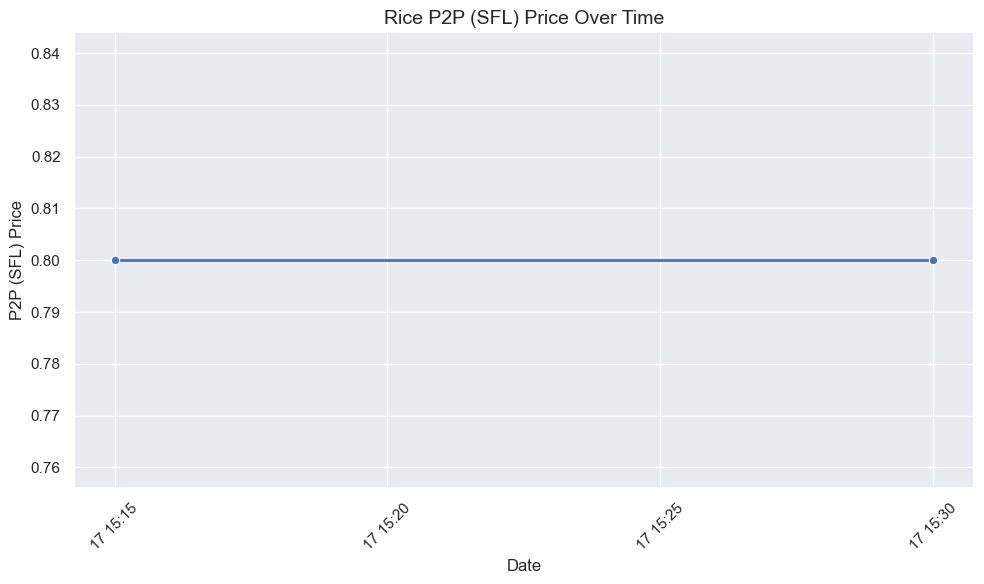

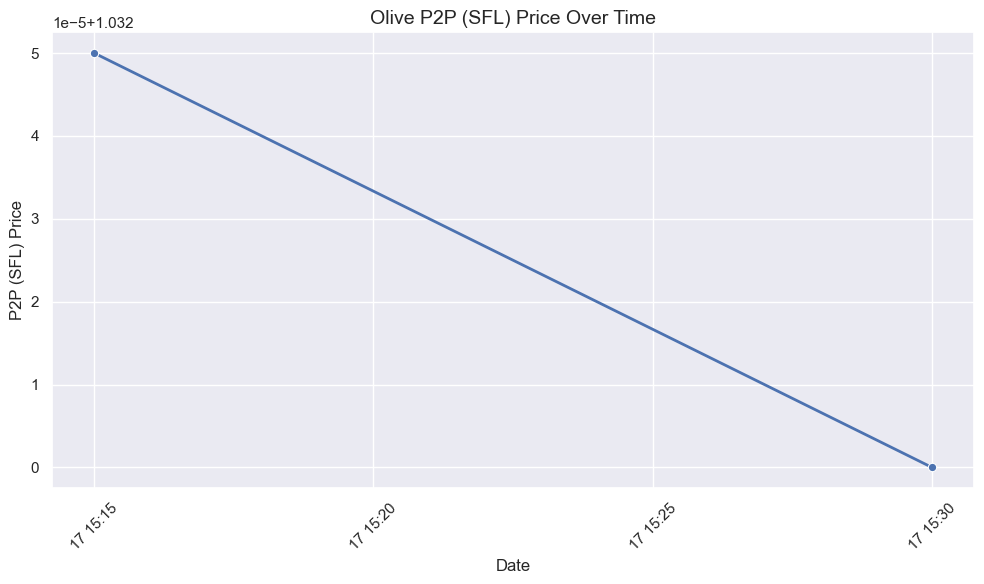

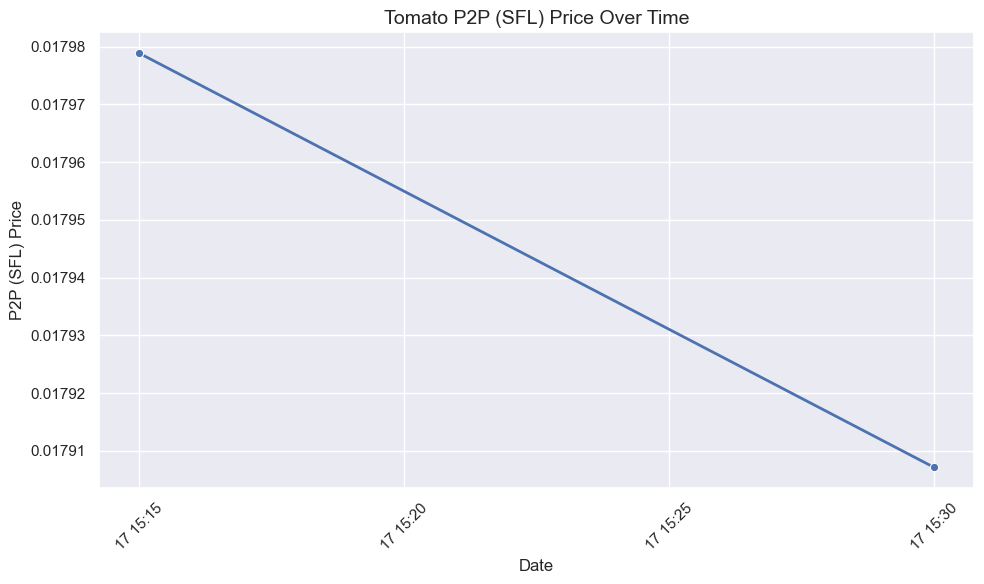

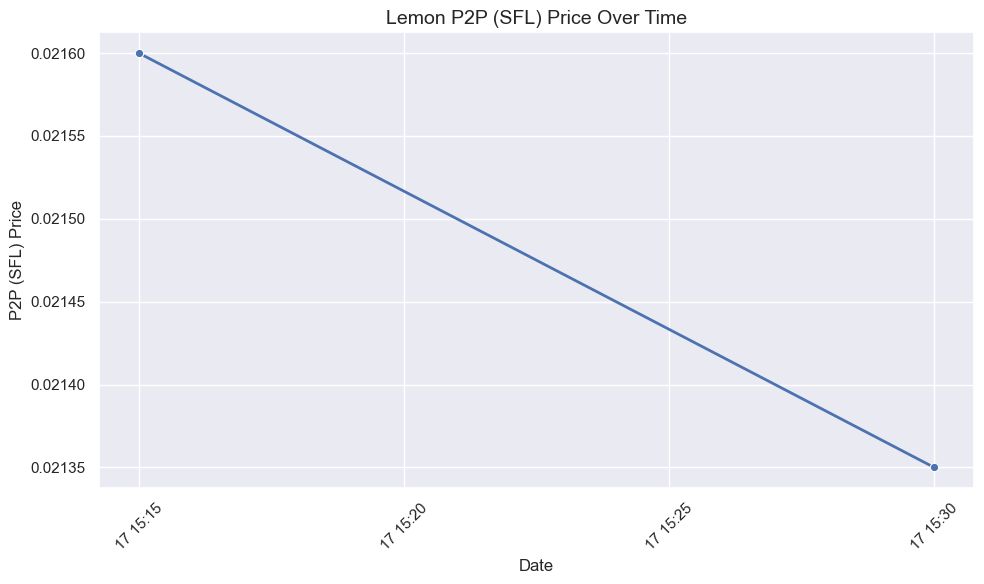

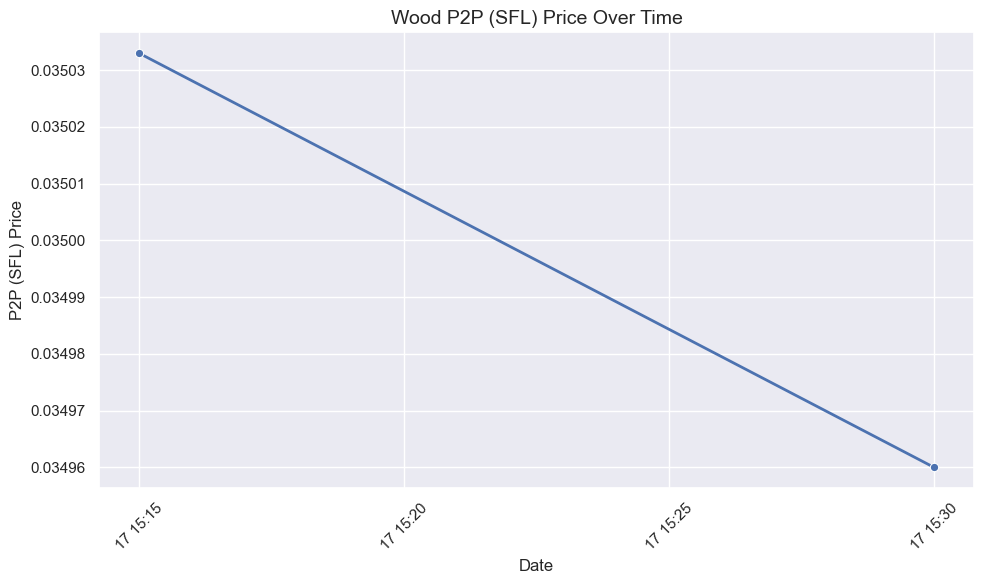

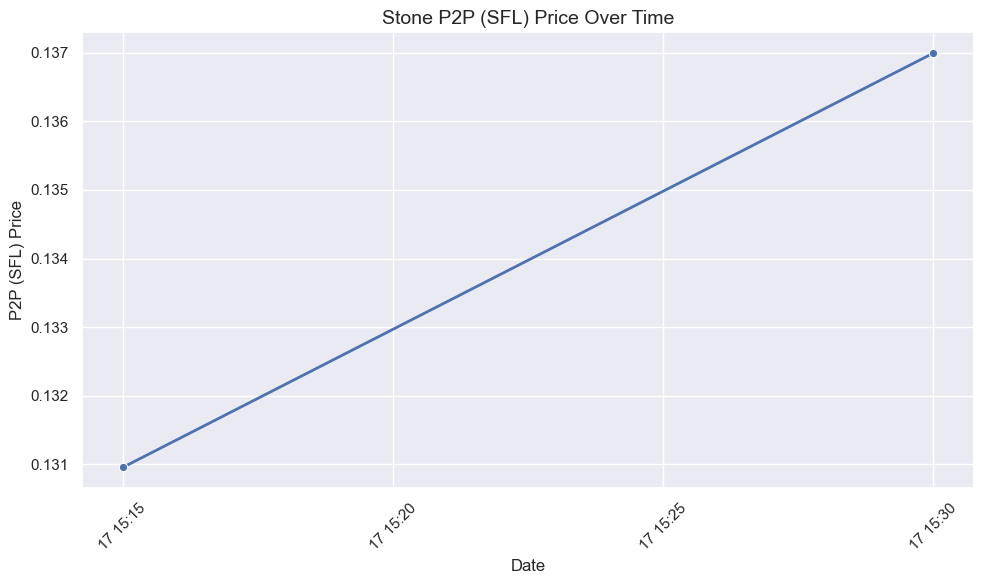

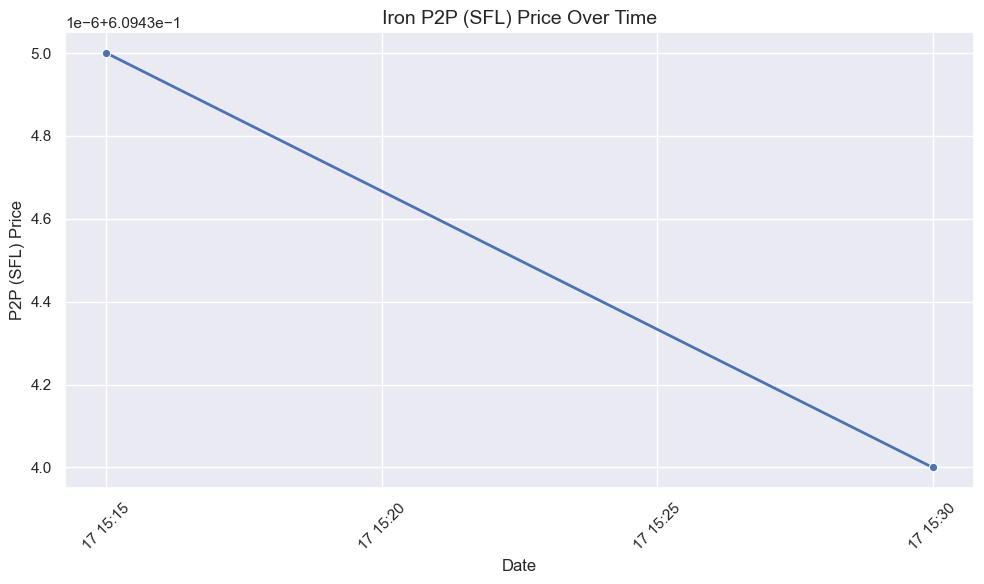

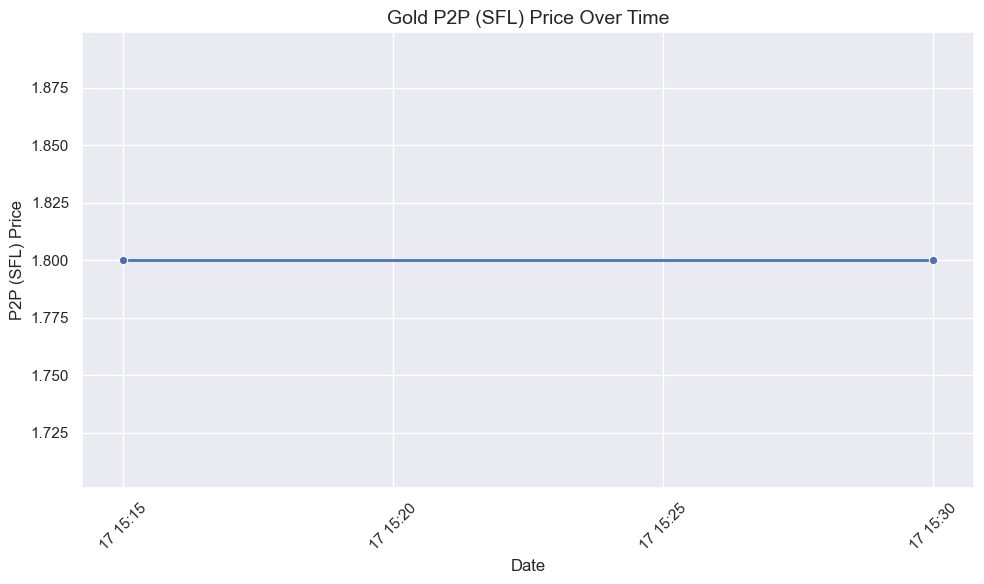

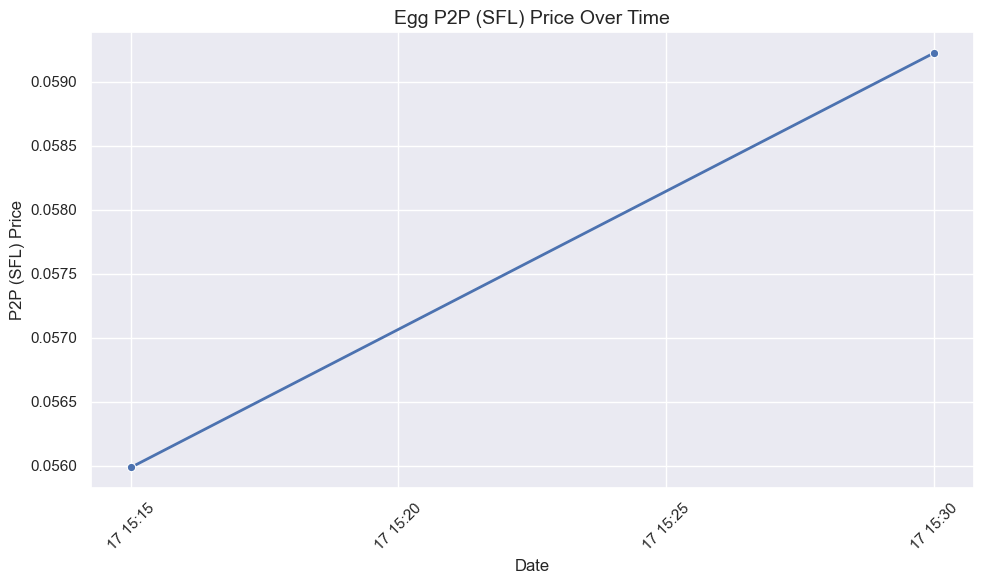

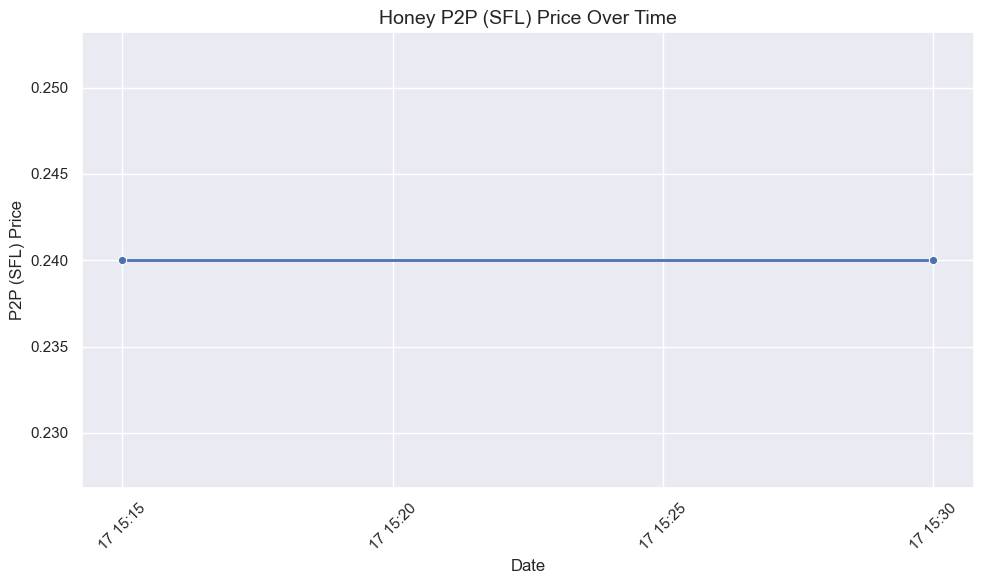

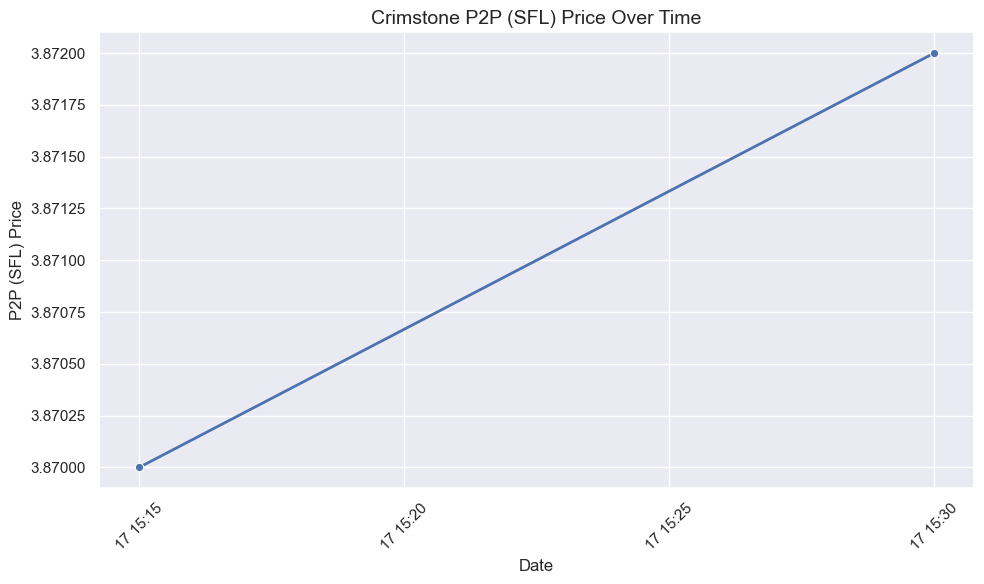

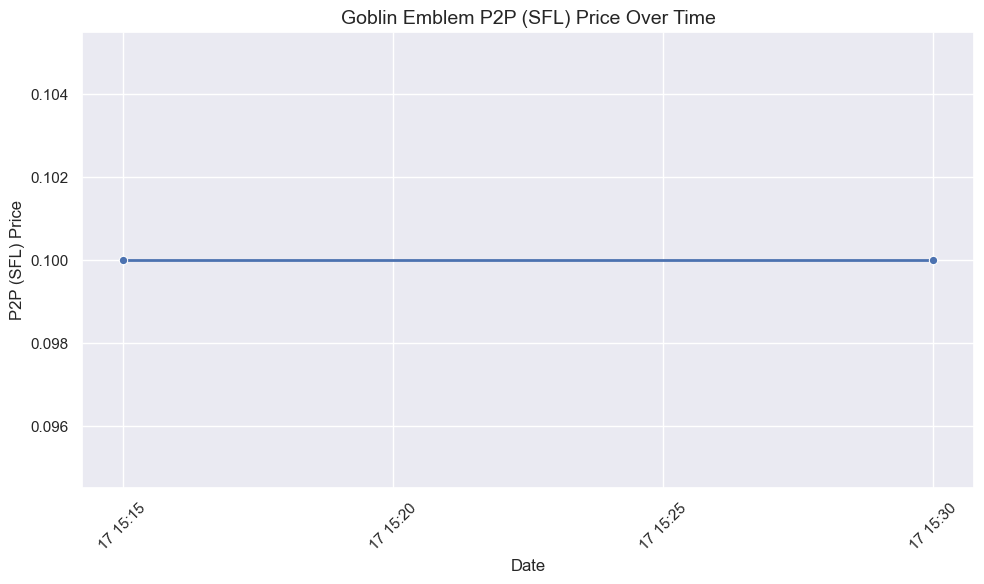

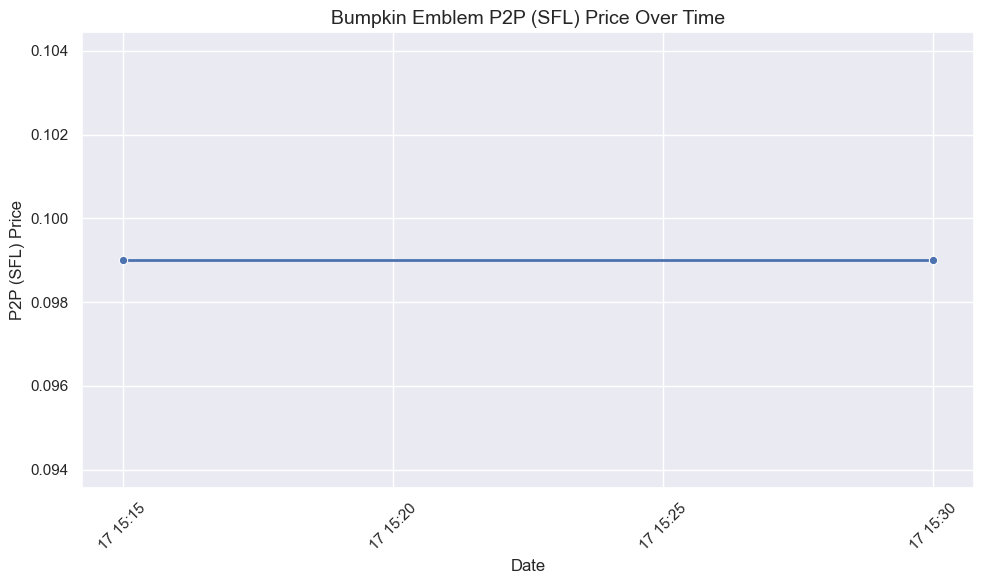

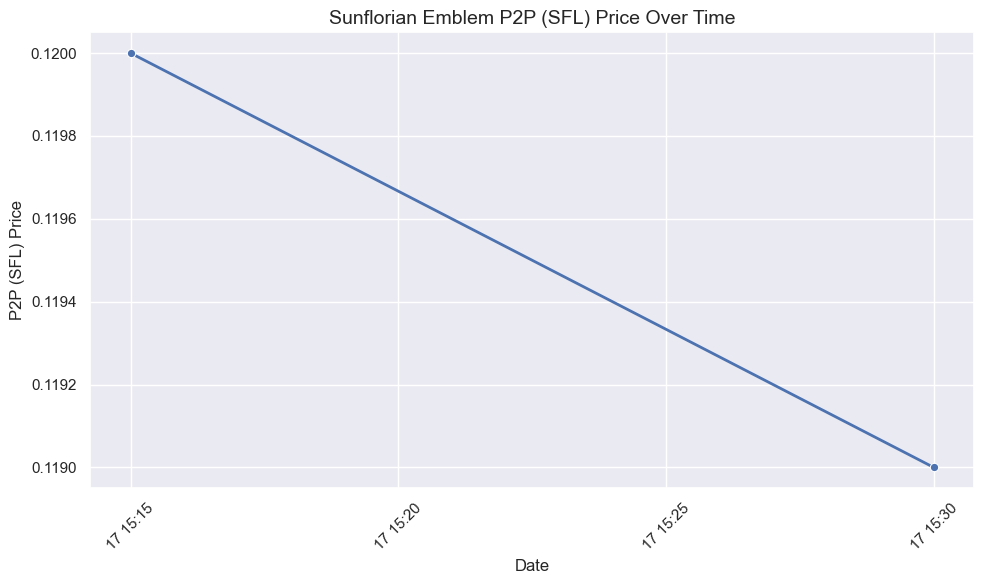

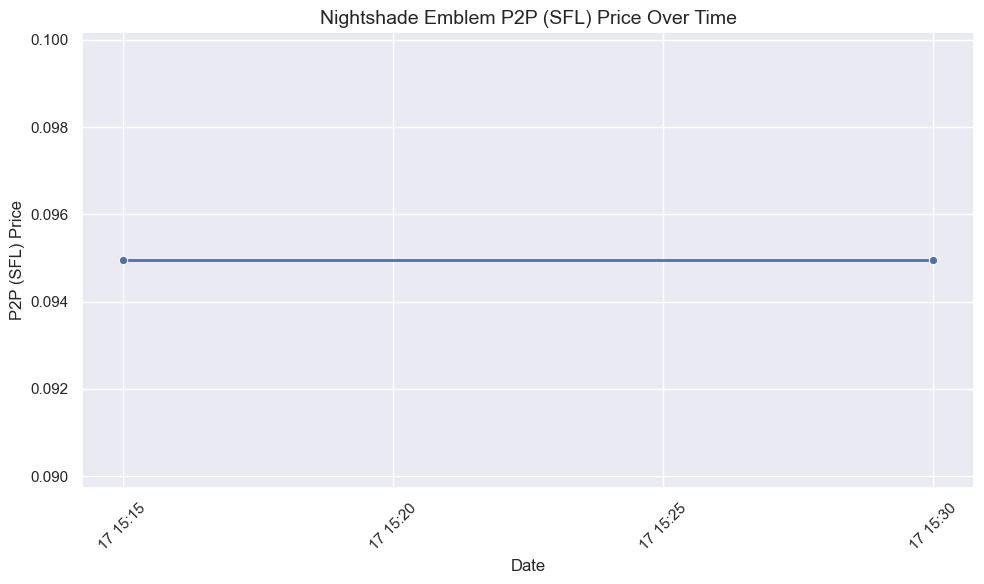

In [14]:
# Load the CSV data (replace with your actual file path)
csv_file = 'price_tracking/resource_prices_2024_10.csv'  # Update this path to the location of your CSV
df = pd.read_csv(csv_file)

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the Seaborn style for better aesthetics
sns.set(style='darkgrid')

# Create a function to plot each resource separately
def plot_each_resource_separately():
    unique_resources = df['Resource'].unique()
    
    # Loop through each resource and plot its price separately
    for resource in unique_resources:
        plt.figure(figsize=(10, 6))
        
        # Filter data for the current resource
        resource_data = df[df['Resource'] == resource]
        
        # Plot
        sns.lineplot(data=resource_data, x='Date', y='P2P (SFL)', marker='o', linewidth=2)
        
        # Add labels and title
        plt.ylabel('P2P (SFL) Price', fontsize=12)
        plt.title(f'{resource} P2P (SFL) Price Over Time', fontsize=14)
        
        # Customize the appearance
        plt.xticks(rotation=45)
        plt.tight_layout()
        
        # Show the plot for this resource
        plt.show()

# Call the function to plot each resource on a separate plot
plot_each_resource_separately()

